# 🦠 Setup and install


First, **install miniconda** if you don't have a working `conda` installation

- Download an appropriate `miniconda` installer from here:   
  https://docs.conda.io/en/latest/miniconda.html  
  and follow the instractions.

## Follow the steps to setup a environment for the workshop

1. **Create a new environment** and install `mamba` to speed up subsequent installations  
  `conda create -n eomaps_workshop -c conda-forge python=3.9 mamba --yes`
2. **Activate the environment**:  
  `activate eomaps_workshop`
3. **Install required packages**  
  `mamba install -c conda-forge eomaps netcdf4 rioxarray --yes`
4. (optionally) install the `spyder ide`  
  `mamba install -c conda-forge spyder pyzmq=24.0.1 ipython=7.33 --yes`  
  <font size="1">  (using `pyzmq=24.0.1` and `ipython=7.33` avoids autocompletion issues with the latest versions)</font>
5. (optionally) install jupyter lab (and ipympl for interactive inline-plots)  
  `mamba install -c conda-forge jupyterlab ipympl --yes`  
  
5. Wait for all commands to complete and then type `spyder` and hit enter to start the `spyder ide`

----


##### ... or if you prefer to do all in 1 line (requires `mamba` installed in the base-env):
`mamba create -n eomaps_workshop -c conda-forge python=3.9 mamba eomaps netcdf4 rioxarray spyder pyzmq=24.0.1 ipython=7.33 --yes`


<hr style="border:3px solid black">

# Getting started with <img src=https://raw.githubusercontent.com/raphaelquast/EOmaps/dev/docs/_static/logo.png width=12% align="center" style="padding-bottom: 1.5%;">

<!---
### Why EOmaps?

- whats the difference to `cartopy`?
  - `cartopy` is nice to create static maps but lacks interactivity
  - `EOmaps` adds another layer on top of `cartopy` to support interactivity
<br><br>

- Many other packages exist that support interactivity out of the box... why create a new one?  
  (`plotly-geo`, `geoviews`, `folium`, `earthpy`, `geemap`, `leafmap` ...)

  - they are almost all just wrappers for javascript (e.g. `leaflet`) or `google-earth-engine`  
    and focused for use in browsers. 
  
  - `EOmaps` is based on `matplotlib/cartopy` and focuses on "offline" usage...   
    (but supports WebMaps and features from NaturalEarth etc.)
    - highly customizable 
    - easy interface
    - python.

--->
  

<div style="display: inline-block">
<hr style="border:1px solid black" align="left">

> **There is an extensive [📖 Documentation](https://eomaps.readthedocs.io/en/latest/?badge=latest) with a lot of examples (incl. source-code)... check it out!**

<hr style="border:1px solid black" align="left">
</div>

<hr style="border:3px solid black">

## Basics - Lets create a map

EOmaps provides many (highly customizable) features that can be added to the map:
- **North-Arrows**
- **Scalebars**
- **Gridlines**
- A interface for features from [NaturalEarth](https://www.naturalearthdata.com/)
- A interface to many open-access **WebMap Services**
- Functionalities to add **Annotations**, **Markers**, **Lines**, **Logos** etc.
- ...

In [1]:
#%matplotlib qt

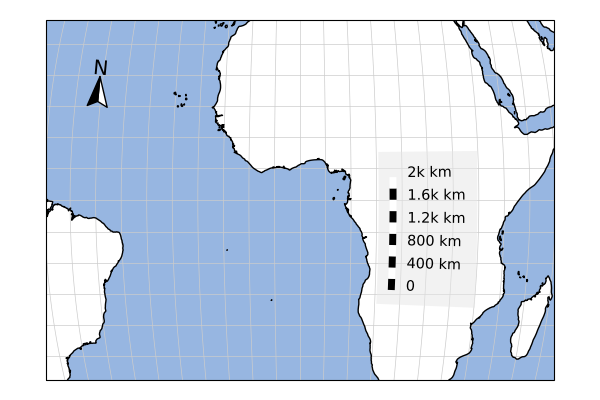

In [2]:
from eomaps import Maps
m = Maps(Maps.CRS.Mollweide(), figsize=(6, 4))
m.set_extent((-50, 50, -20, 20))

m.add_feature.preset.coastline()
m.add_feature.preset.ocean()

m.add_gridlines(5, c=".8")
m.add_compass(pos=(.1, .76), style="north arrow")
m.add_scalebar(
    auto_position=(0.68, 0.25),
    autoscale_fraction=0.45, 
    patch_props=dict(fc=".9", ec="none", alpha=0.5))

m.snapshot(clear=True)

## Plotting Data

## Inset Maps

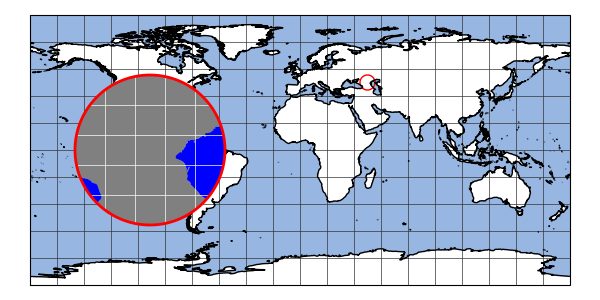

In [3]:
from eomaps import Maps
m = Maps(figsize=(6, 3))
m.add_feature.preset.coastline()
m.add_feature.preset.ocean()
m.add_gridlines()

m2 = m.new_inset_map(plot_position=(0.25, 0.5))
m2.add_feature.physical.ocean(fc="b", scale=50)
m2.add_feature.physical.land(fc=".5", scale=50)
m2.add_gridlines(2, c="w")
m.snapshot(clear=True)